<a href="https://colab.research.google.com/github/SaravanaPriyanD/Deep_Learning-Projects/blob/master/RA_TF_Project1_Celcius_To_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
Temperature_df = pd.read_csv('/content/drive/My Drive/Colab Files/Ryan_TF/Project1/original.csv')
Temperature_df.reset_index(drop=True, inplace=True)

In [8]:
Temperature_df
Temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


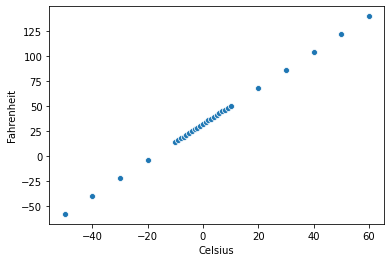

In [9]:
sns.scatterplot(Temperature_df['Celsius'], Temperature_df['Fahrenheit'])

In [0]:
X_train = Temperature_df['Celsius']
y_train = Temperature_df['Fahrenheit']


In [11]:
X_train.shape

(30,)

In [12]:
y_train.shape

(30,)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [22]:
epochs_hist = model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 1.6149
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 1.4529
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 1.2961
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 1.1436
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.9992
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.8682
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.7549
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.6606
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5829
Epoch 10/500
1/1 [==============================] - 0s 1ms/step - loss: 0.5175
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4592
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4042
Epoch 13/500
1/1 [==============================] - 0s 2ms/st

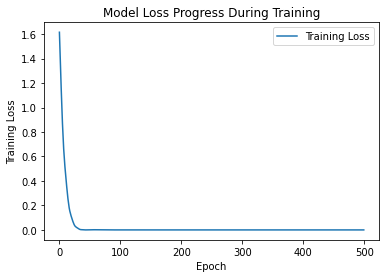

In [23]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [24]:
model.get_weights()

[array([[1.8]], dtype=float32), array([32.00002], dtype=float32)]

In [30]:
# Use the trained model to perform predictions

Temp_C = 10
Temp_F = model.predict([Temp_C])
print('Temperature in degF Using Trained ANN =', Temp_F)

Temperature in degF Using Trained ANN = [[50.00002]]


In [31]:
# Let's confirm this Using the equation: 
Temp_F = 9/5 * Temp_C + 32
print('Temperature in degF Using Equation =', Temp_F)

Temperature in degF Using Equation = 50.0
